# Project Overview

This project aims to analyze air quality data, specifically focusing on NO2 levels, to uncover trends, seasonal patterns, and insights. By using Python’s powerful data manipulation and visualization libraries, we will:

- Clean and preprocess the data to ensure accuracy.
- Resample the data to aggregate it at a daily level.
- Apply rolling windows to smooth the data and highlight trends.
- Perform seasonal decomposition to separate the data into trend, seasonal, and residual components.
- Visualize the findings effectively to communicate the insights.

# Introduction

In this analysis, we will explore air quality data using time series analysis techniques. We will clean and preprocess the data, apply resampling and rolling windows to analyze trends, decompose the data to identify seasonal patterns, and visualize our findings. Each step will be explained in detail to provide a comprehensive understanding of the process.

# Data Preparation

Data preparation is crucial as it ensures the data is clean and ready for analysis.

1. __Load the Data:__ We load the dataset using pandas.

2. __Check Column Names:__ Print the first few rows and column names to understand the data structure.

3. __Set Index:__ Ensure the ‘datetime’ column is set as the index.

4. __Select Relevant Columns:__ Choose the columns we are interested in.

Handle Missing Values: Drop rows with missing values.
Sort the Data: Ensure the data is sorted by datetime for proper time series analysis.



In [1]:
import pandas as pd 

# Load the dataset 
data_url = 'https://raw.githubusercontent.com/EdulaneDotCo/kaggle/main/data/AirQualityUCI.csv'
df_air_quality = pd.read_csv(data_url, sep = ';', decimal = ',', na_values=-200)

# Print the first few rows and column names to varify
print(df_air_quality.head())
print(df_air_quality.columns)

# Set datetime as index
df_air_quality['datetime'] = pd.to_datetime(df_air_quality['Date'] + ' ' + df_air_quality['Time'], format= '%d/%m/%Y %H.%M.%S')
df_air_quality.set_index(df_air_quality['datetime'], inplace= True)

# Select the required columns (check exact column names from df_air_quality.columns output)
selected_columns = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']
df_air_quality = df_air_quality[selected_columns]

# Drop rows with missing values
df_air_quality.dropna(inplace = True)

# Ensure the data is sorted by datetime for proper time series analysis.
df_air_quality.sort_index(inplace=True)
print(df_air_quality.head())



         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

__Code Explanation:__

- __Load the Data:__ We use __pd.read_csv__ to load the dataset from a URL. We specify the separator as ‘;’, the decimal as ‘,’, and parse the ‘Date’ and ‘Time’ columns together into a new ‘datetime’ column. We also specify that -200 should be considered as `NaN`.

- __Print the First Few Rows:__ We use `print(df_air_quality.head())` to display the first few rows of the dataset to verify it loaded correctly.

- __Ensure ‘datetime’ is Set as Index:__ We convert the ‘Date’ and ‘Time’ columns to a datetime object and set it as the index using `df_air_quality.set_index('datetime', inplace=True)`.

- __Select Relevant Columns:__ We specify a list of columns we are interested in and create a new DataFrame with just those columns.

- __Handle Missing Values:__ We drop rows with missing values using `df_air_quality.dropna(inplace=True)`.

- __Sort the Data:__ We ensure the data is sorted by the datetime index using `df_air_quality.sort_index(inplace=True)`.

# Resampling and Rolling Windows 

To analyze trends, we use resampling and rolling windows.

1. __Plot the Data:__ Visualize the original and smoothed data to observe trends.

2. __Resample Data:__ Resample the data to daily averages to smooth out fluctuations.

3. __Apply Rolling Window:__ Apply a 7-day rolling window to further smooth the time series.

__Note:__ Continue after the previous code 

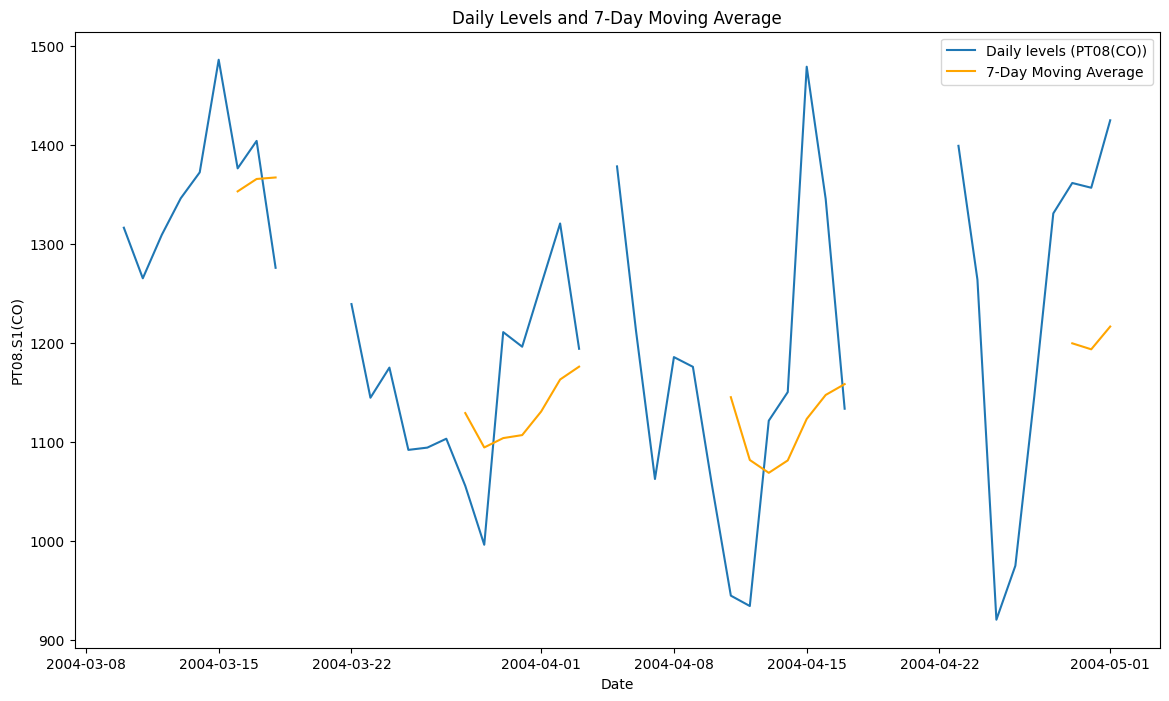

In [2]:
# Import matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt

# Resample the data to daily averages to smooth out the series
df_daily_air_quality = df_air_quality.resample('D').mean()

# Apply a rolling window to smooth the time series (e.g., 7-day rolling window)
df_daily_rolling_air_quality = df_daily_air_quality.rolling(window=7).mean()


# Pllot the resample data
plt.figure(figsize=(14,8))
plt.plot(df_daily_air_quality['PT08.S1(CO)'], label = 'Daily levels (PT08(CO))')
plt.plot(df_daily_rolling_air_quality['PT08.S1(CO)'], label = "7-Day Moving Average", color = 'orange')
plt.title('Daily Levels and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('PT08.S1(CO)')
plt.legend()
plt.show()



__Code Explanation:__

- __Resample Data:__ We use `df_air_quality.resample('D').mean()` to resample the data to daily frequency and calculate the mean for each day. This smooths out the series by aggregating the data into daily averages.

- __Apply Rolling Window:__ We apply a 7-day rolling window using `df_daily_air_quality.rolling(window=7).mean()`, which further smooths the time series by calculating the average of the current day and the previous six days.

- __Plot the Data:__ We use matplotlib to plot the original daily levels and the 7-day moving average. This helps us visualize the trend and fluctuations in the data.

# Seasonal Decomposition

Seasonal decomposition helps in breaking down the time series data into trend, seasonal, and residual components.

1. __Ensure Frequency:__ Ensure the index has a frequency set.

2. __Interpolate Missing Values:__ Fill missing values using interpolation.

3. __Perform Seasonal Decomposition:__ Decompose the time series

__Note:__ Continue after previous code

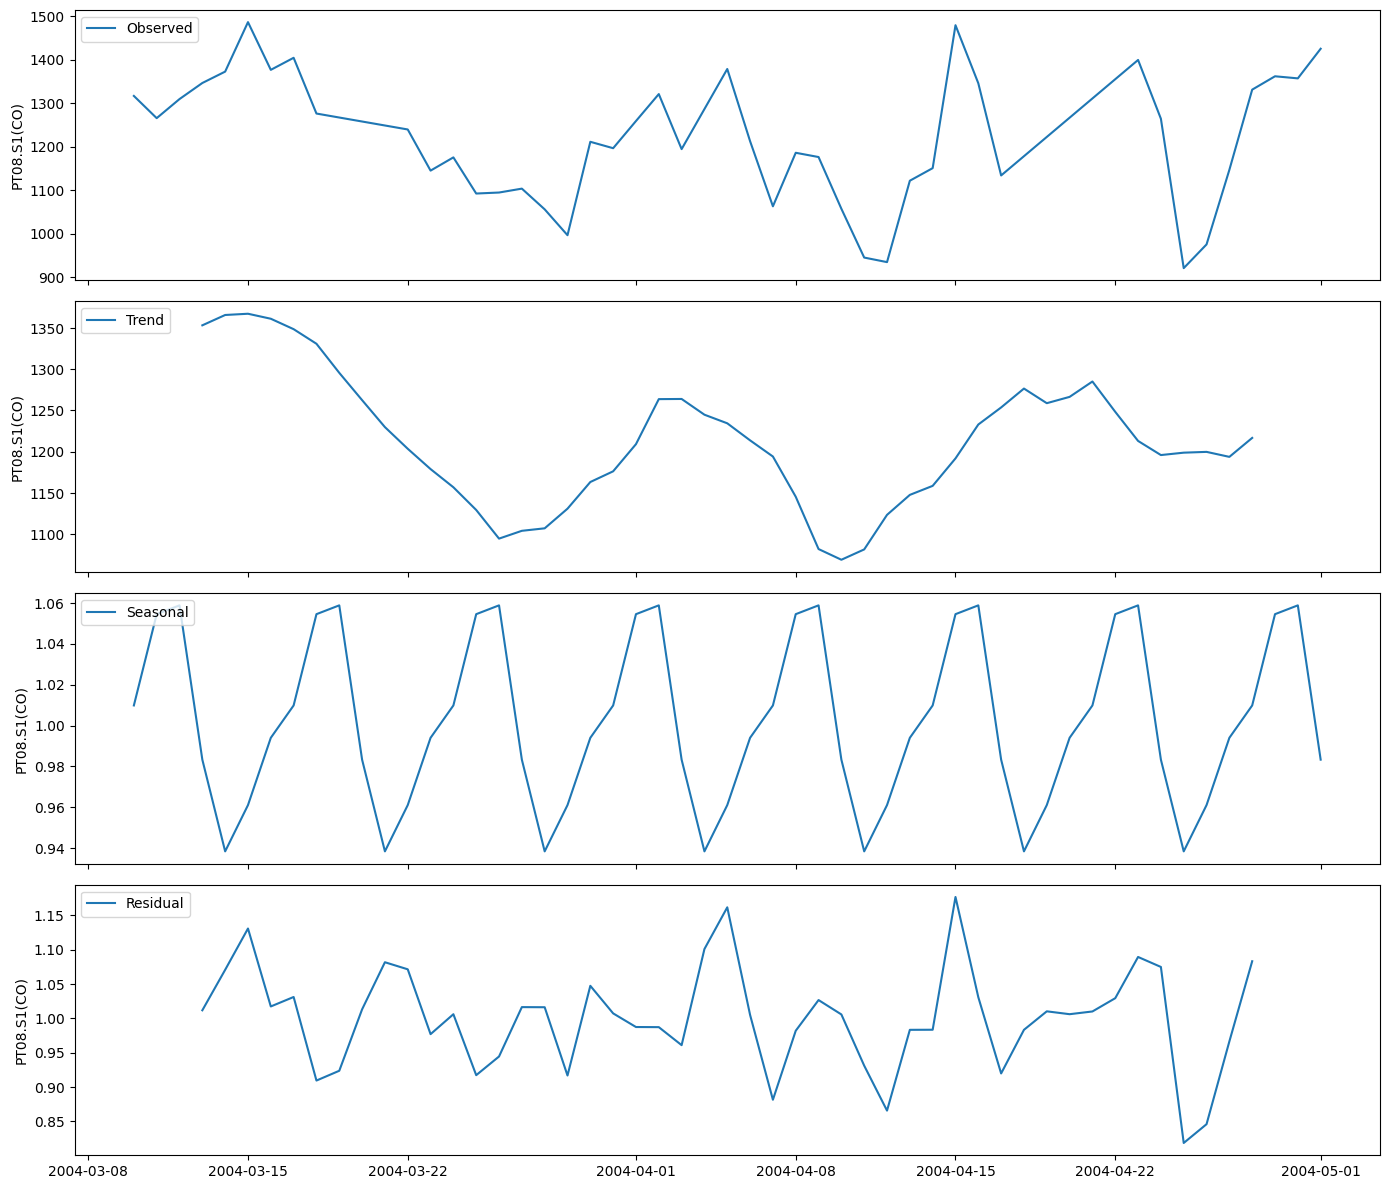

In [3]:
# Import seasonal decompose module from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the index has a frequency set
df_daily_air_quality = df_daily_air_quality.asfreq('D')

# Interpolation missing values
df_daily_air_quality = df_daily_air_quality.interpolate()

# Decompose the time series to identify patterns with a weekly period (7 days) on one of the columns (e.g., 'PT08.S1(CO)').
decomposed_data = seasonal_decompose(df_daily_air_quality['PT08.S1(CO)'], model = 'multiplicative', period = 7)

# Plot the decompose components 
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize = (14,12), sharex = True)

# Plot graph for observed data
ax1.plot(decomposed_data.observed, label = 'Observed')
ax1.legend(loc = 'upper left')
ax1.set_ylabel('PT08.S1(CO)')

# Plot graph for trend data
ax2.plot(decomposed_data.trend, label = 'Trend')
ax2.legend(loc = 'upper left')
ax2.set_ylabel('PT08.S1(CO)')

# Plot graph for seasonal data
ax3.plot(decomposed_data.seasonal, label = 'Seasonal')
ax3.legend(loc = 'upper left')
ax3.set_ylabel('PT08.S1(CO)')

# Plot graph for residual data
ax4.plot(decomposed_data.resid, label = 'Residual')
ax4.legend(loc = 'upper left')
ax4.set_ylabel('PT08.S1(CO)')

plt.tight_layout()
plt.show()

__Code Explanation:__

- __Ensure Frequency:__ We set the frequency of the datetime index to daily using `df_daily_air_quality.asfreq('D')`. This ensures the time series is evenly spaced, which is required for seasonal decomposition.

- __Interpolate Missing Values:__ We fill any missing values using linear interpolation with __df_daily_air_quality.interpolate()__. This ensures there are no gaps in the data.

- __Perform Seasonal Decomposition:__ We use `seasonal_decompose` to decompose the time series into observed, trend, seasonal, and residual components. We specify a multiplicative model and a period of 7 days to capture weekly patterns.

- __Plot the Decomposed Components:__ We plot the observed, trend, seasonal, and residual components using `matplotlib`. This helps us understand the underlying patterns and variations in the data.


# Visualization

Visualization helps in understanding and communicating the findings effectively.

__Visualize Decomposed Components:__ Plot the decomposed components (observed, trend, seasonal, and residual) for better insights.

__Visualize Original and Smoothed Data:__ Plot multiple columns to observe trends.

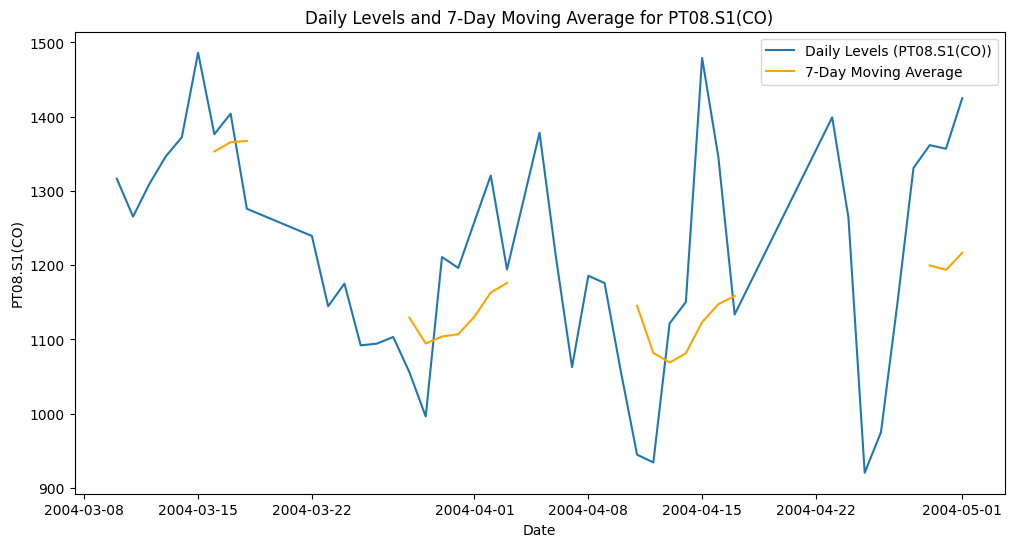

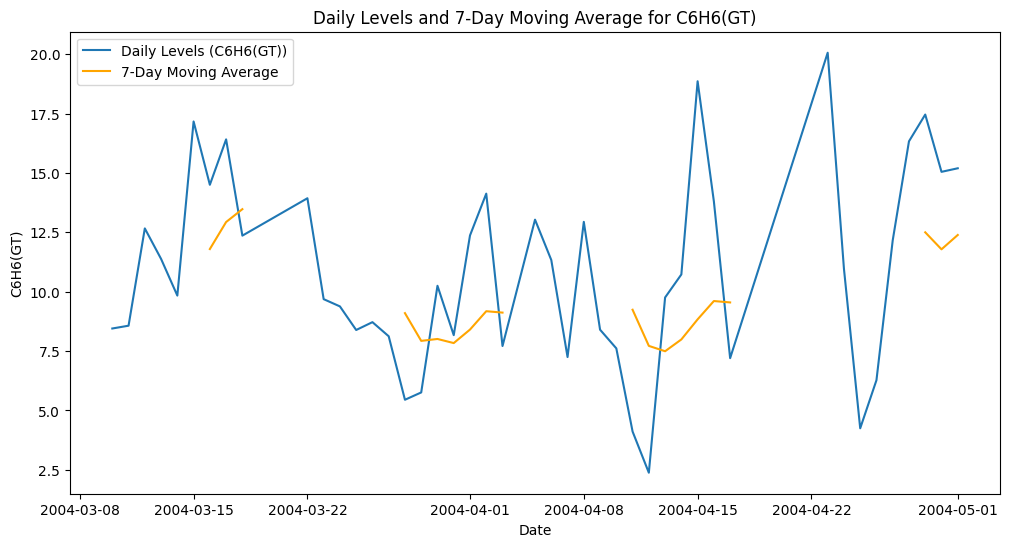

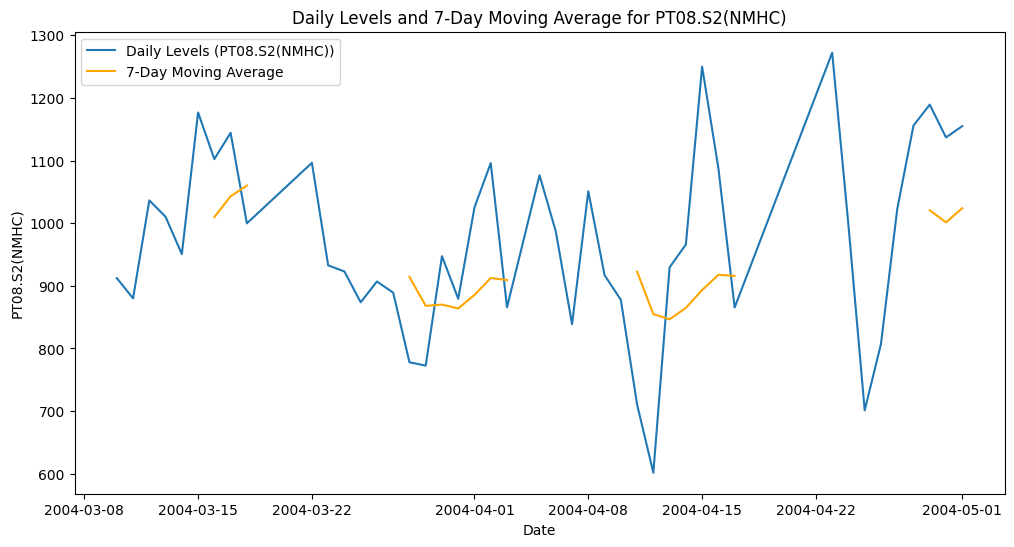

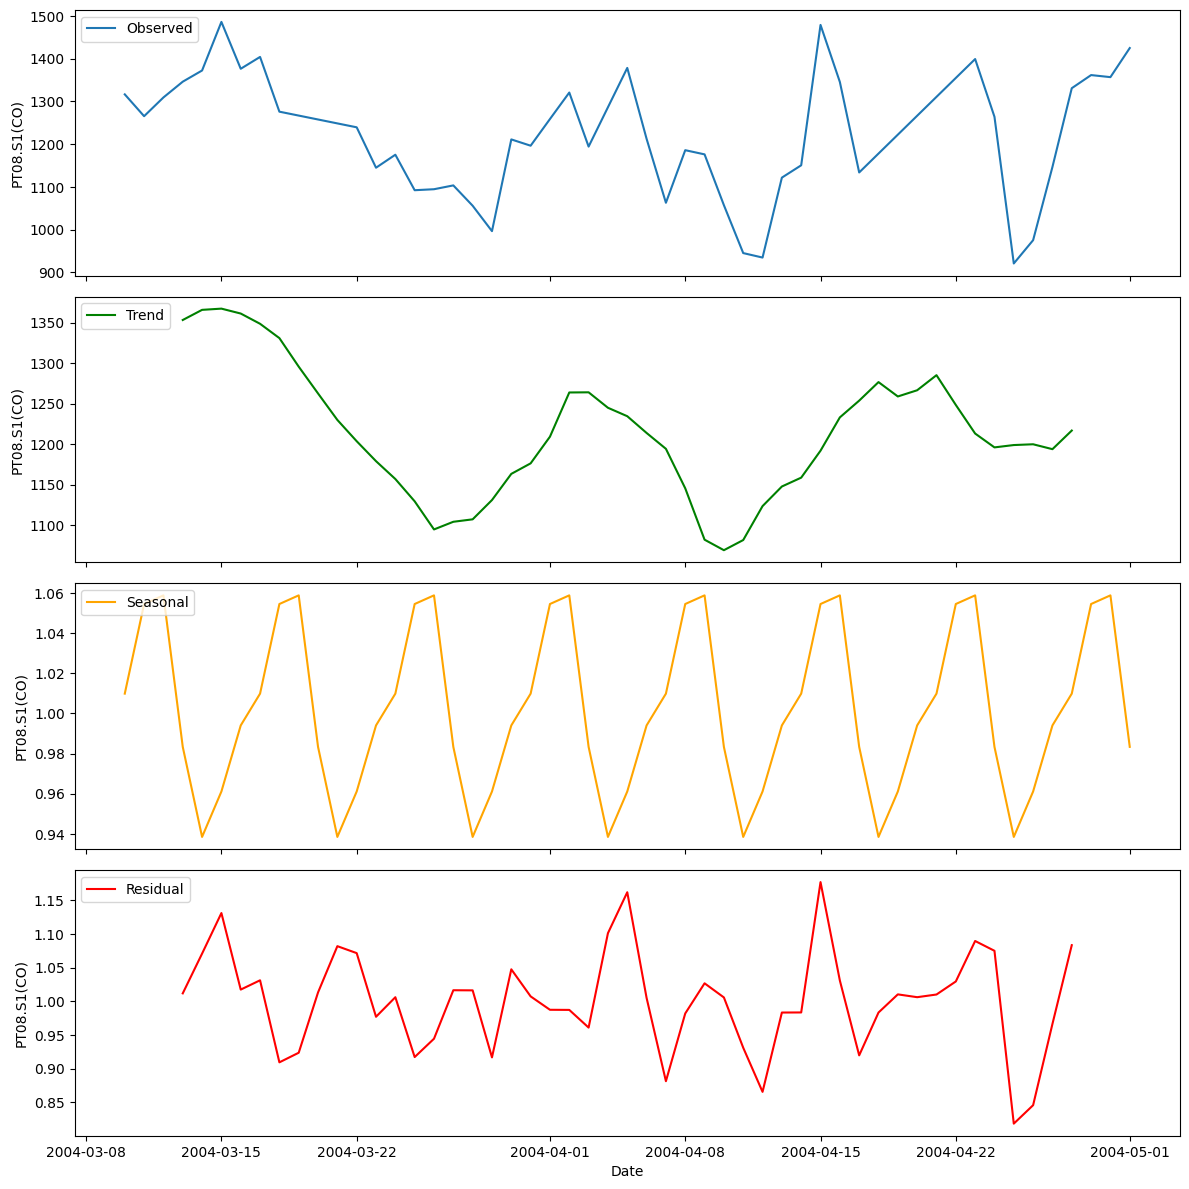

In [4]:
# Visualize Original and Smoothed Data for multiple columns
columns_to_plot = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    plt.plot(df_daily_air_quality[column], label=f'Daily Levels ({column})')
    plt.plot(df_daily_rolling_air_quality[column], label='7-Day Moving Average', color='orange')
    plt.title(f'Daily Levels and 7-Day Moving Average for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Visualize Decomposed Components for 'PT08.S1(CO)'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Observed
ax1.plot(decomposed_data.observed, label='Observed')
ax1.legend(loc='upper left')
ax1.set_ylabel('PT08.S1(CO)')

# Trend
ax2.plot(decomposed_data.trend, label='Trend', color='green')
ax2.legend(loc='upper left')
ax2.set_ylabel('PT08.S1(CO)')

# Seasonal
ax3.plot(decomposed_data.seasonal, label='Seasonal', color='orange')
ax3.legend(loc='upper left')
ax3.set_ylabel('PT08.S1(CO)')

# Residual
ax4.plot(decomposed_data.resid, label='Residual', color='red')
ax4.legend(loc='upper left')
ax4.set_ylabel('PT08.S1(CO)')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()

__Code Explanation:__

- __Visualize Original and Smoothed Data:__ We iterate over multiple columns and plot the daily levels and 7-day moving averages for each column. This helps us compare the trends and fluctuations across different pollutants.

- __Visualize Decomposed Components:__ We plot the observed, trend, seasonal, and residual components of the ‘PT08.S1(CO)’ column. This helps us understand how the data is decomposed into different components and identify any underlying patterns.

# Conclusion 

By following these steps, you can effectively analyze air quality data, identify trends and seasonal patterns, and visualize the findings. This structured approach ensures you cover all essential aspects of time series analysis and make informed decisions based on the data insights.